# Statistics Notes - part one loading and exploring, plotting and calculating simple statistics

Python and stats combined together make one's life so much simpler and your job more pleasurable.

These notes I made as a revision notebook for myself.


In [60]:
from sklearn.datasets import load_iris
data = load_iris()
print(type(data.data))
#print(data.feature_names)
print(data.keys())
print(data.target_names)
print(data.feature_names)



<class 'numpy.ndarray'>
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


# This is a sample dataset of Iris versicolor

NOTE: I worked through these exercises on DataCamp - visit them!

In [10]:
import numpy as np
versicolor_petal_length = data.data
print(versicolor_petal_length[:5]) #check

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


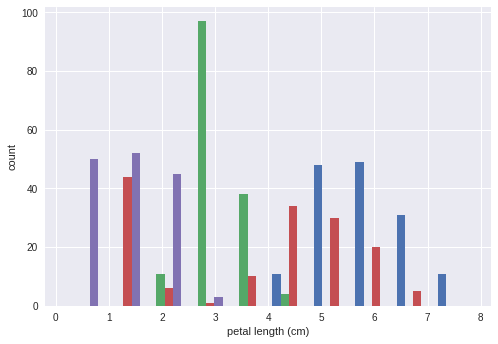

In [15]:
%matplotlib inline
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')
# Show histogram
_ = plt.show()

## Rebinning so that the number of bins is 
\begin{equation*}
\sqrt{n}
\end{equation*}


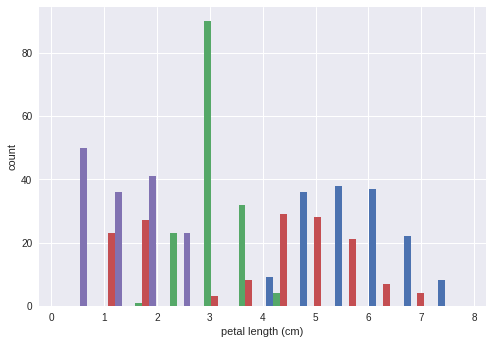

In [16]:
# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
_ = plt.hist(versicolor_petal_length, bins=n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

In [81]:
species_types_col = data.target
species = data.target_names

import pandas as pd

species_remapped = np.array([species[index] for index in species_types_col])

df_species = pd.DataFrame(species_remapped, columns=['species'])

df = pd.DataFrame(data.data, columns=data.feature_names)

df_combined = pd.concat([df, df_species], axis=1)


print(df_combined.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


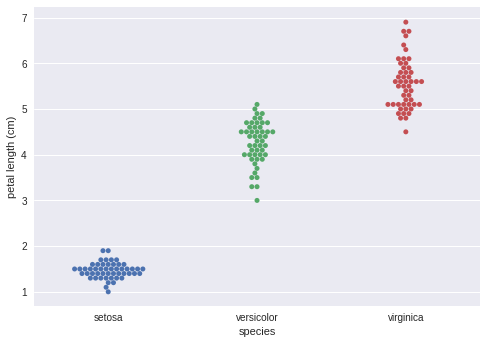

In [82]:
# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x = 'species', y = 'petal length (cm)', data=df_combined)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')
# Show the plot
_ = plt.show()

### Empirical cumulative distribution function

Defining function to calculate 

In [83]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

ECDF gives you probablitiy of finding particular statistic having 




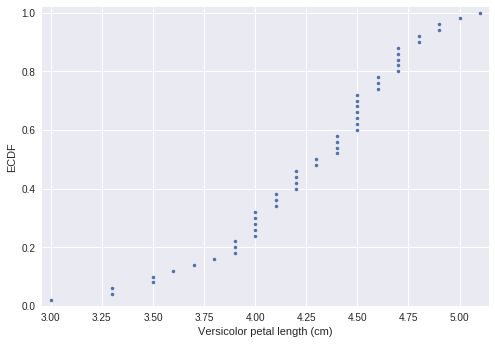

In [109]:

# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(df_combined.loc[df_combined.species == 'versicolor']['petal length (cm)'].values)

# Generate plot
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')

# Make the margins nice
_ = plt.margins(0.02)

# Label the axes
_ = plt.xlabel('Versicolor petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
_ = plt.show()

In [107]:
print(df_combined.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


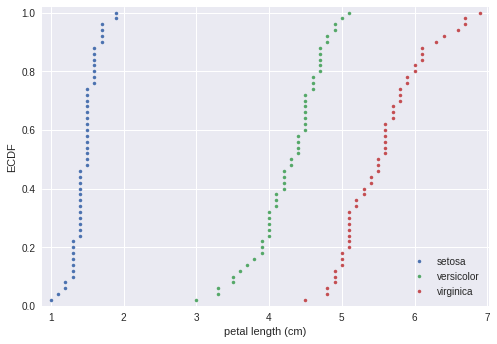

In [114]:
# Compute ECDFs
x_set, y_set = ecdf(df_combined.loc[df_combined.species == 'setosa']['petal length (cm)'].values)
x_vers, y_vers = ecdf(df_combined.loc[df_combined.species == 'versicolor']['petal length (cm)'].values)
x_virg, y_virg = ecdf(df_combined.loc[df_combined.species == 'virginica']['petal length (cm)'].values)

# Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker='.', linestyle='none')
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.plot(x_virg, y_virg, marker='.', linestyle='none')

# Make nice margins
_ = plt.margins(0.02)

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()